# <center>Project Part-I (Clustering)<center>

<p>Team Name:
<p>Student Names:
<p>Student W#s:

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
import seaborn as sns

## Read Data

In [94]:
df = pd.read_csv('application_data.csv')
#dataset.head()
df1 = df.copy()
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df1.shape

(307511, 122)

In [62]:
print(df1.select_dtypes('float').columns)

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

## Visual Exploration of Data

In [96]:
df1.select_dtypes('object').describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [98]:
object_columns = df1.select_dtypes(include='object')

# Find missing values in object columns
missing_values = object_columns.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Calculate percentage of missing values for all columns
percent = df1.isnull().sum().sort_values(ascending=False) / len(df1) * 100
percent = percent[percent > 0]

# Display columns with missing values and their percentage
result = pd.concat([columns_with_missing_values, percent], axis=1, keys=['Total', 'Percentage'])
print(result)

                           Total  Percentage
NAME_TYPE_SUITE           1292.0    0.420148
OCCUPATION_TYPE          96391.0   31.345545
FONDKAPREMONT_MODE      210295.0   68.386172
HOUSETYPE_MODE          154297.0   50.176091
WALLSMATERIAL_MODE      156341.0   50.840783
...                          ...         ...
EXT_SOURCE_2                 NaN    0.214626
AMT_GOODS_PRICE              NaN    0.090403
AMT_ANNUITY                  NaN    0.003902
CNT_FAM_MEMBERS              NaN    0.000650
DAYS_LAST_PHONE_CHANGE       NaN    0.000325

[67 rows x 2 columns]


In [101]:
#we are dropping columns with missing values greater than 50%
unwanted_objects = ['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']

#missing value cleaning for other object attributes
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].fillna('No Value')

df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode())


### Histograms

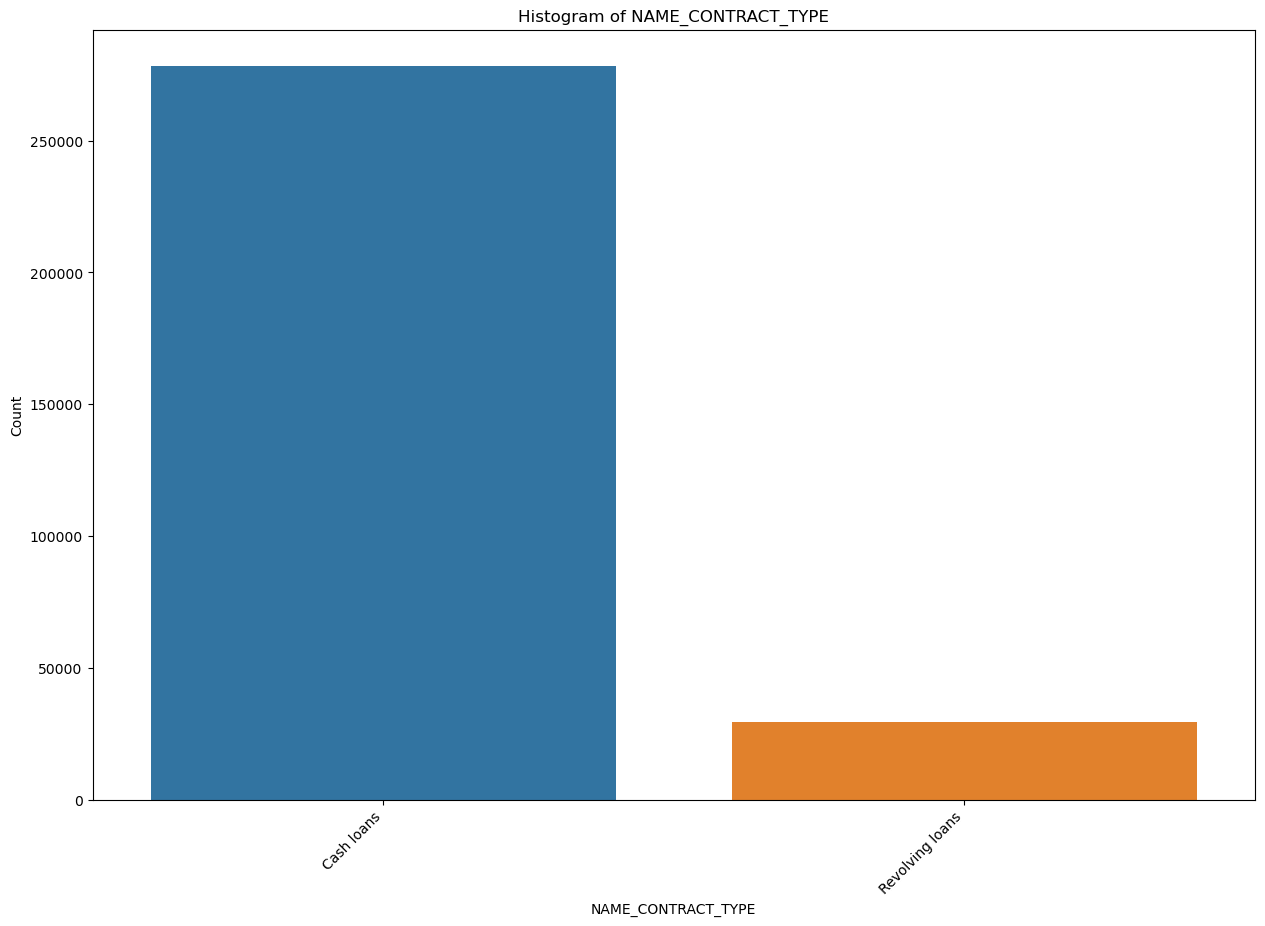

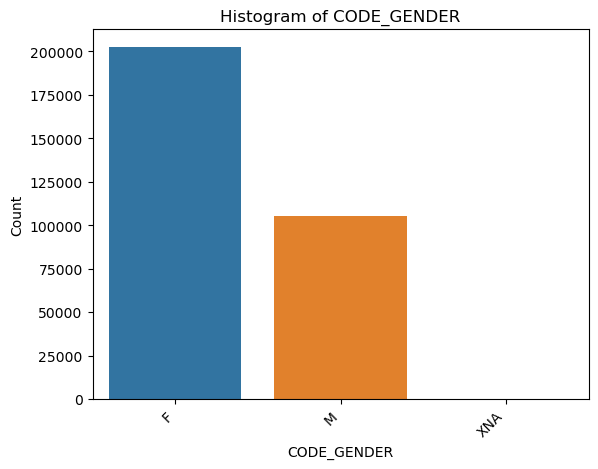

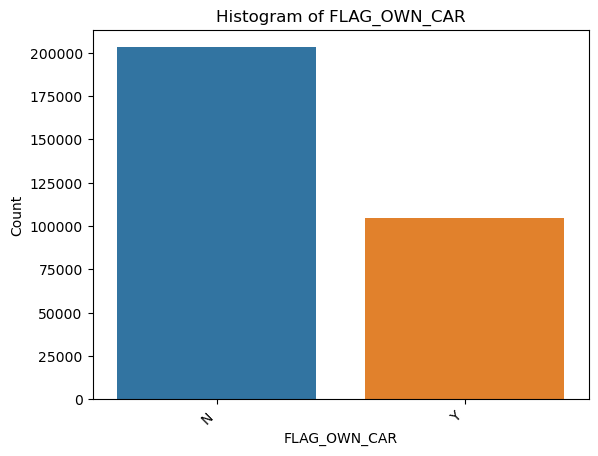

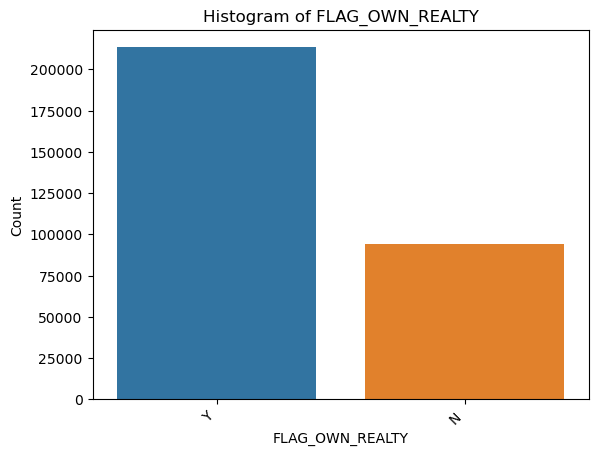

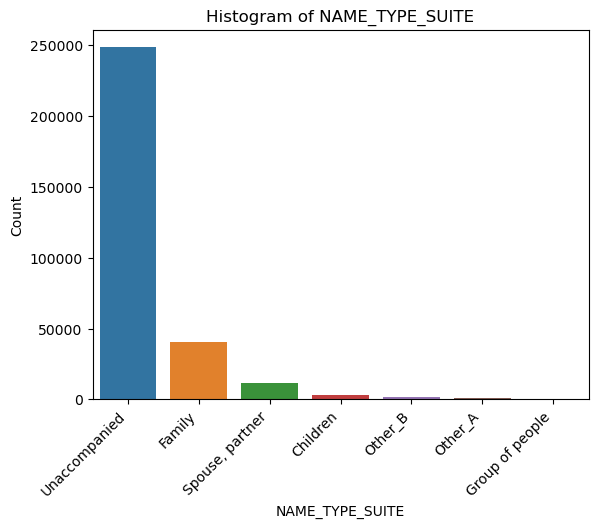

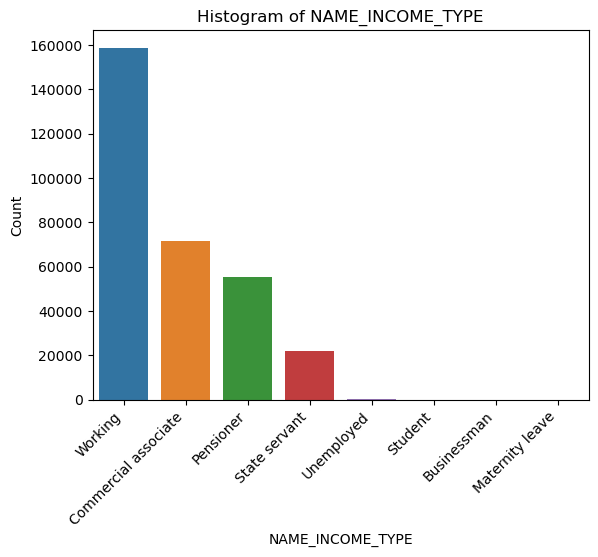

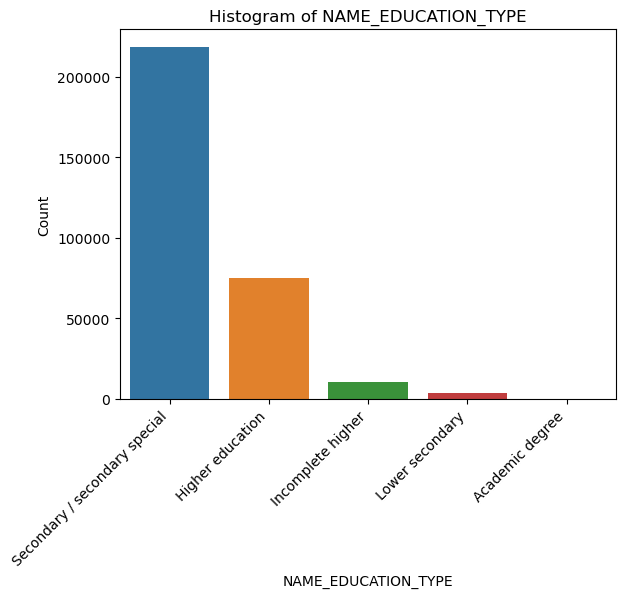

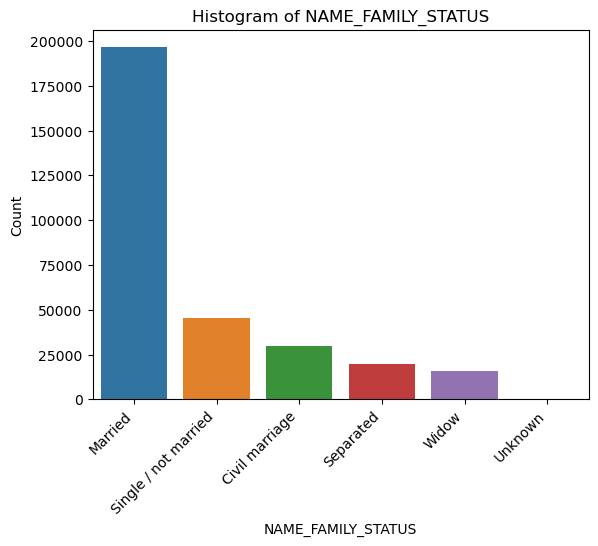

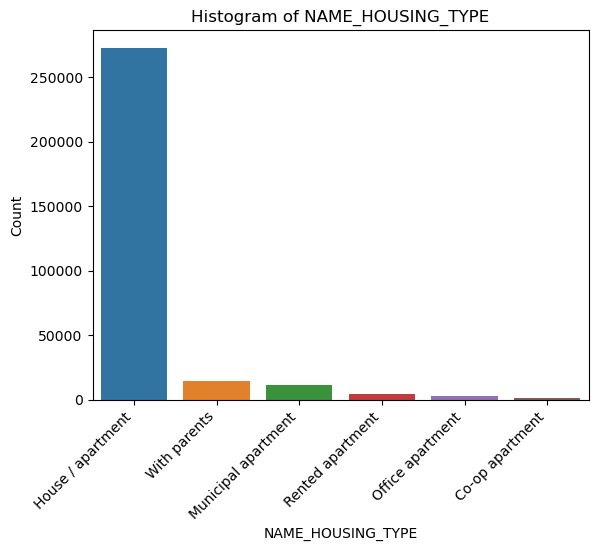

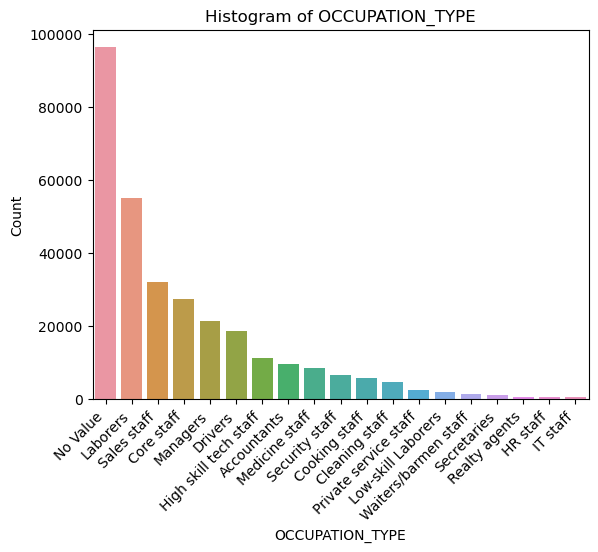

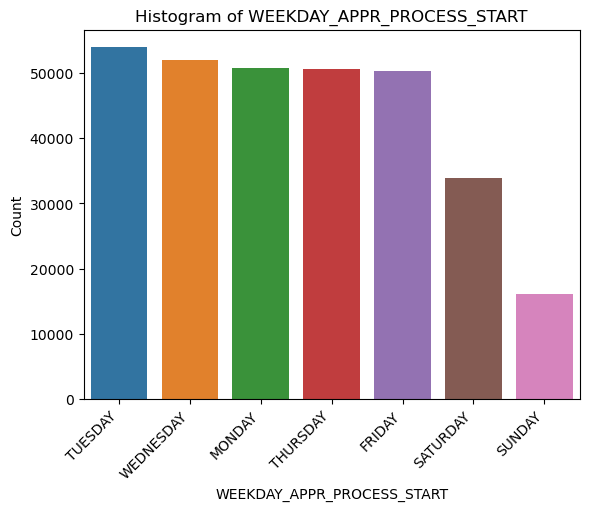

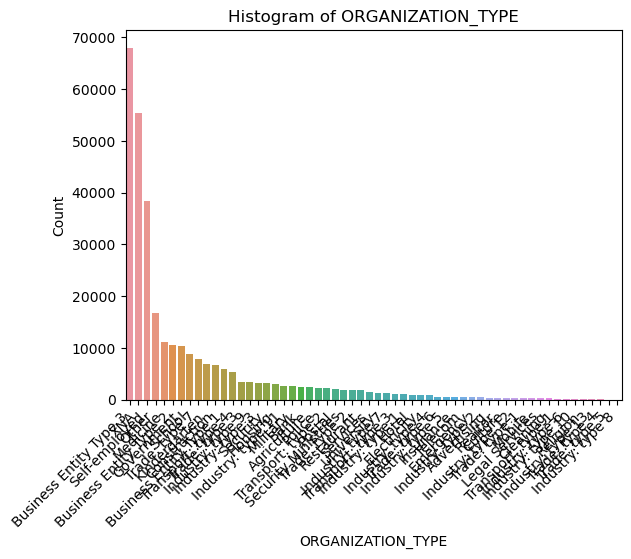

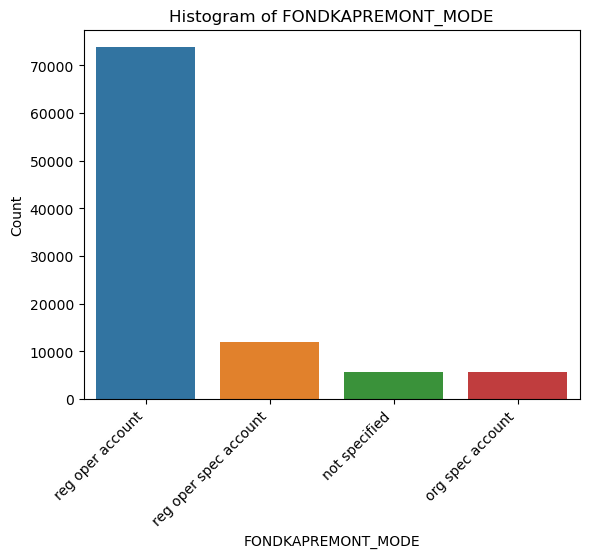

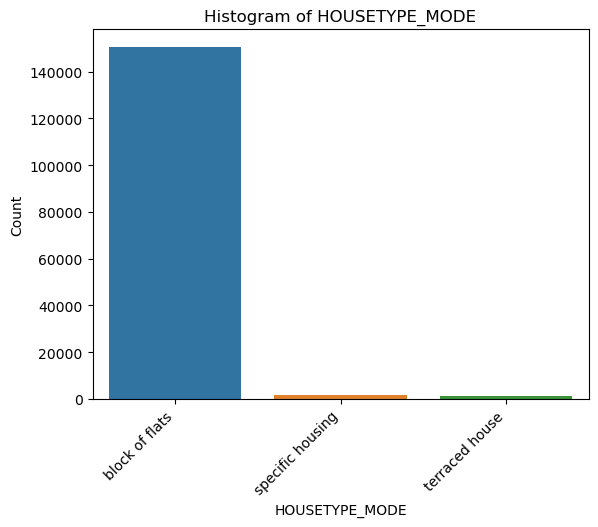

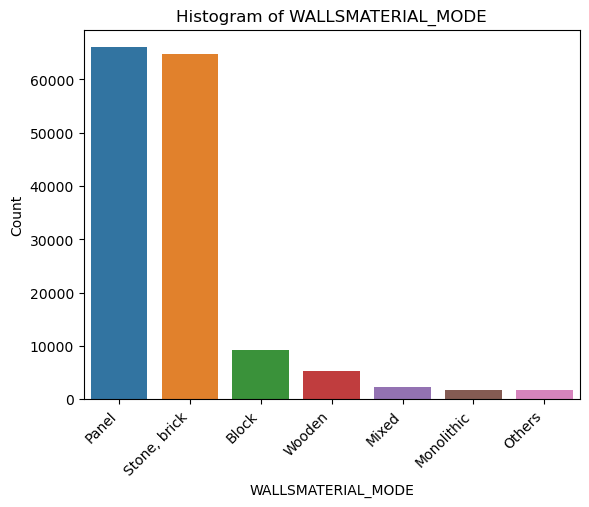

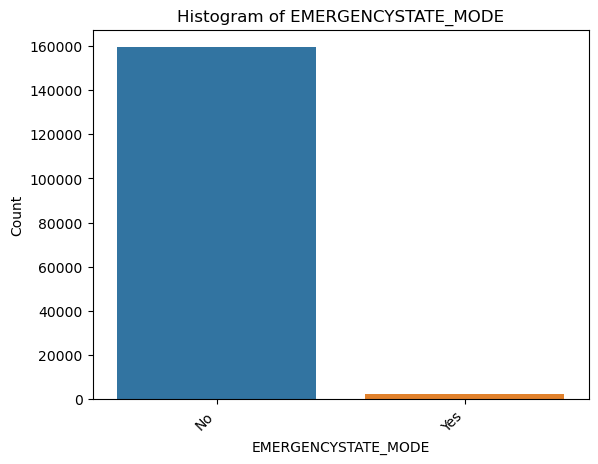

In [111]:
#ALL OBJECTS
object_columns = df1.select_dtypes(include='object')

# Plot histograms for all object columns
plt.figure(figsize=(15, 10))
for column in object_columns.columns:
    sns.countplot(data=df1, x=column, order=df1[column].value_counts().index)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

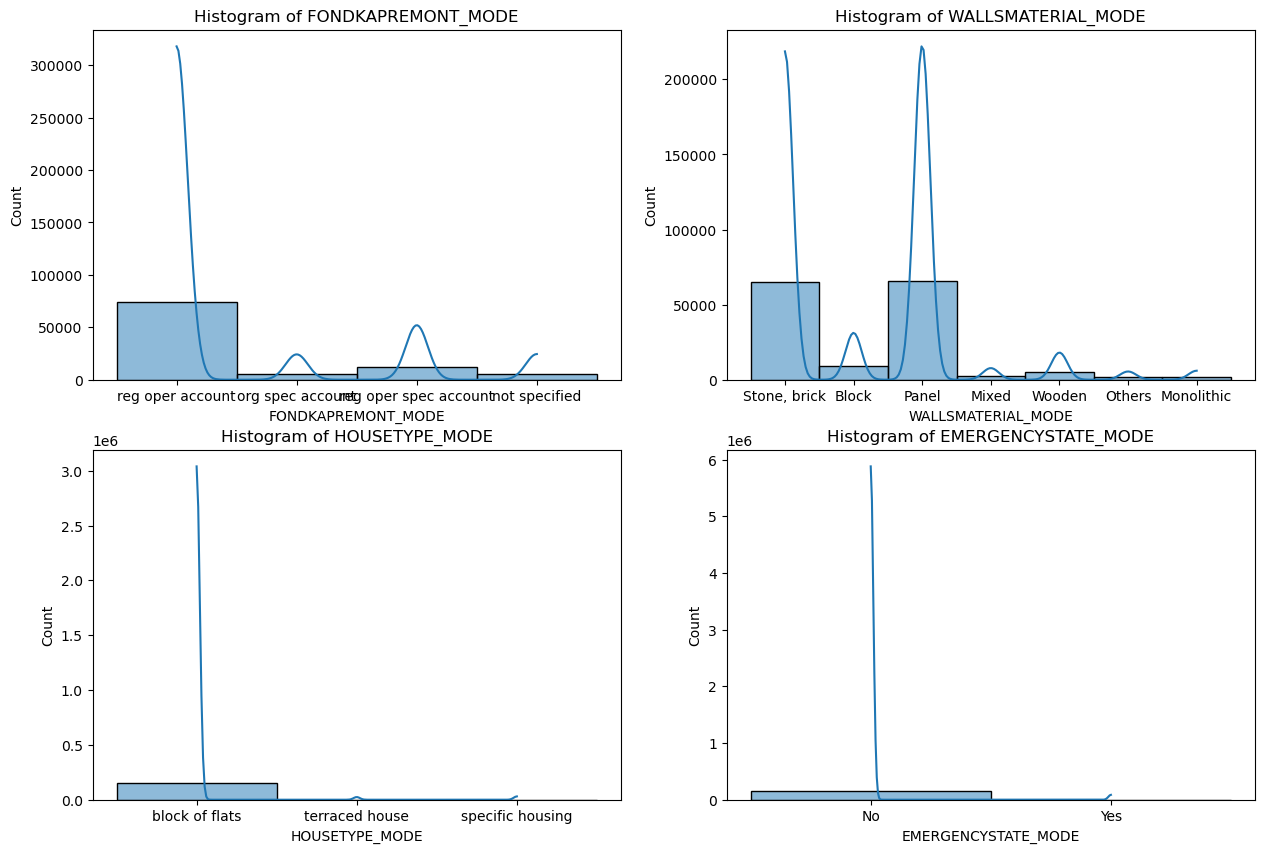

In [107]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Plot histograms for unwanted columns
for i, column in enumerate(unwanted_objects):
    row, col = divmod(i, 2)
    sns.histplot(data=df1, x=column, bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

plt.show()

### Distributions

In [108]:
#we print integer attributes 
print(df1.select_dtypes('int').columns)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


In [110]:
#WE DIVIDE ALL INTEGER VALUES INTO SECTIONS 
contact = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
region =  ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']
city = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
docs = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
rate = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
other = ['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']



### Box-Whisker Plots

### Violin Plots

## Data Quality & Cleaning

Instruction: Add a comment for each method

## Handling Redundancy

### X-square Test

### Correlation Analysis

### Visual Exploration (scatter-plot matrix)

## Dimensionality Reduction

### PCA

## Discretization

### Histogram of Discretized Attribute

### X-square Test of Discretized Attributes

### Visual Exploration (scatter-plot matrix) of Discretized Attributes

## Feature Selection/Generation

### Select Features

### Generate Features

# Generate Clusters

<center>FOR CMPS 451/551</center>

## K-means

## Hierarchical

<center>FOR ISAT 651</center>

## CLARANS

## DBSCAN

## CHAMELEON

## CLIQUE

# Evaluation of Clusters

See instructions provided in the report template

# Comparison of Clustering Outcomes

See instructions provided in the report template

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.